KNN

In [1]:
"""pip install --upgrade pandas"""


'pip install --upgrade pandas'

c:\Users\47476\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


importing Jupyter notebook from preprocess.ipynb
Melding ID                       0
Meldingstidspunkt                0
Meldingsdato                     0
Meldingsklokkeslett              0
Starttidspunkt                   0
Startdato                        0
Startklokkeslett                 0
Startposisjon bredde             0
Startposisjon lengde             0
Hovedområde start (kode)      2001
Hovedområde start             4124
Lokasjon start (kode)         2001
Havdybde start                   0
Stopptidspunkt                   0
Stoppdato                        0
Stoppklokkeslett                 0
Varighet                         0
Fangstår                         0
Stopposisjon bredde              0
Stopposisjon lengde              0
Hovedområde stopp (kode)      1962
Hovedområde stopp             4124
Lokasjon stopp (kode)         1962
Havdybde stopp                   0
Trekkavstand                    24
Redskap FAO (kode)               0
Redskap FAO                    188
Redska

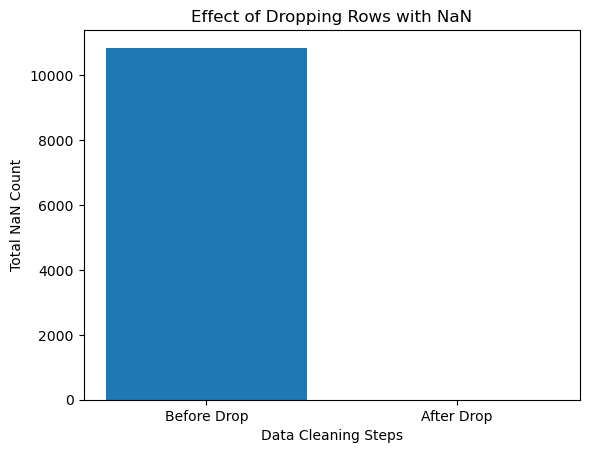

Art - FDIR
Torsk                  56507
Sei                    42495
Hyse                   39080
Lange                  17328
Uer (vanlig)           14151
                       ...  
Sagtang                    1
Annen makrell              1
Blåhval                    1
Annen laksefisk            1
Bukstripet pelamide        1
Name: count, Length: 121, dtype: int64


,Startdato,Startposisjon bredde,Startposisjon lengde,Havdybde start,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Art - FDIR,Rundvekt,Bredde,Fartøylengde,Month
2,2017-12-30,74.885,16.048,-335.0,295.0,74.914,15.969,-334.0,3970.0,51.0,0,8510.0,12.6,56.8,12
4,2017-12-30,74.885,16.048,-335.0,295.0,74.914,15.969,-334.0,3970.0,51.0,1,134.0,12.6,56.8,12
6,2017-12-31,74.910,15.868,-403.0,267.0,74.901,16.248,-277.0,11096.0,51.0,0,6651.0,12.6,56.8,12
9,2017-12-31,74.910,15.868,-403.0,267.0,74.901,16.248,-277.0,11096.0,51.0,1,67.0,12.6,56.8,12
12,2017-12-31,74.883,16.056,-346.0,315.0,74.924,15.742,-496.0,10215.0,51.0,0,5097.0,12.6,56.8,12


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

"""#execute the entire 'preprosses' notebook in your current notebook
%run preprosses.ipynb"""
import import_ipynb
from preprocess import df
df.head()

Splitting dataset
Vi are divinfing datset into features. We also have to split these into both test and trainingset. So after that we can see if the ML is doing good or not. 

In [3]:
# Assuming your target variable is 'Art - FDIR' 
features = ['Startposisjon bredde', 'Startposisjon lengde', 'Havdybde start', 'Varighet',
            'Stopposisjon bredde', 'Stopposisjon lengde', 'Havdybde stopp', 'Trekkavstand', 'Redskap FDIR (kode)', 
            'Rundvekt', 'Bredde', 'Fartøylengde']#This will soon just be the ((columns) - ART)
X = df[features]
y = df['Art - FDIR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standarisation and scaing 


Can be smart to normalize the featurtes because then no feature is very different from one another 
We are leverling out the feild for all features so the KNN works better and make even more accurate predictions  

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Apply the scaling transformation to the training data (X_train)
# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaling transformation to the test data (X_test)
# Transform the test data using the parameters learned from the training data
X_test_scaled = scaler.transform(X_test)


# Make a KNN classefier with the k as 3 

In [5]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier with  3 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = knn_classifier.predict(X_test_scaled)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6583000858542498


# Computing a confuion matrix and visulazing it

Here it is showing a summary of preformance of the classifications models 

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.71     11337
           1       0.60      0.58      0.59      8464

    accuracy                           0.66     19801
   macro avg       0.65      0.65      0.65     19801
weighted avg       0.66      0.66      0.66     19801



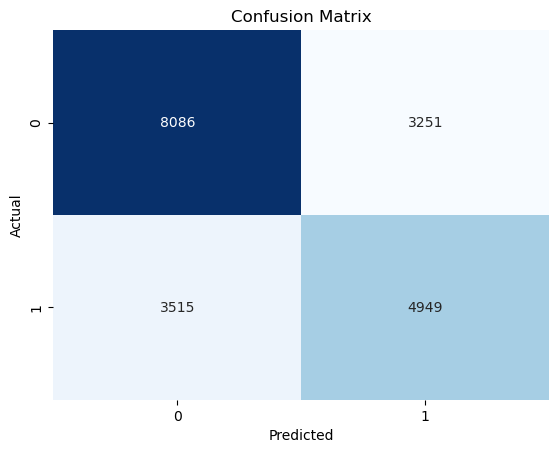

In [7]:

# Print the classification report
report = classification_report(y_test, predictions)
print("Classification Report:\n", report)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Looking at over and underfitting 

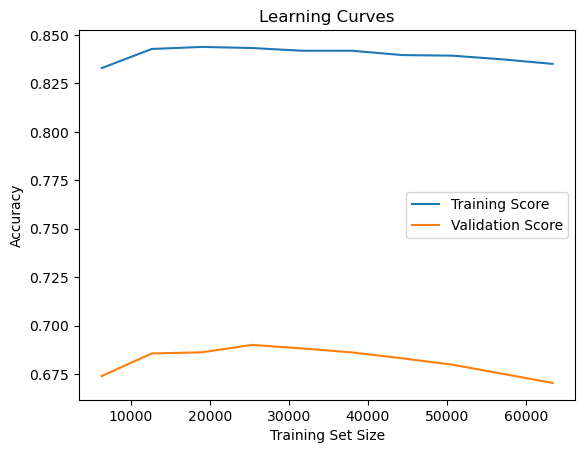

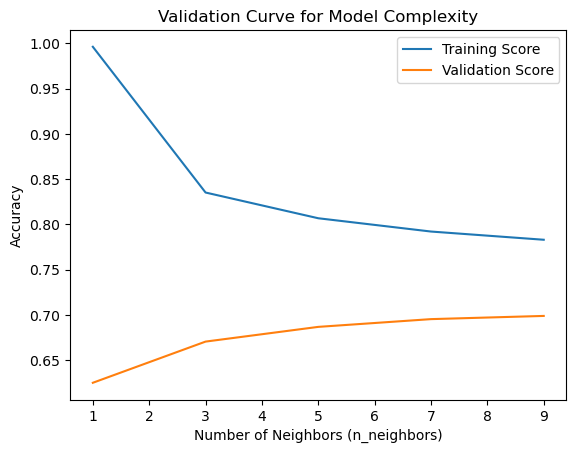

In [8]:
# Assessing Overfitting or Underfitting
from sklearn.model_selection import learning_curve, validation_curve

# 1. Learning Curves
train_sizes, train_scores, test_scores = learning_curve(
    knn_classifier, X_train_scaled, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curves')
plt.show()

# 2. Validation Curve for Model Complexity
param_range = [1, 3, 5, 7, 9]  # Example values for n_neighbors
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X_train_scaled, y_train, param_name='n_neighbors',
    param_range=param_range, cv=5, scoring='accuracy'
)

plt.figure()
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Score')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Curve for Model Complexity')
plt.show()

The training score is much higher then validation, wich indicates overfitting.